In [2]:
# The Naives Bayes Classifier algo

import numpy as np
from collections import defaultdict
import pandas as pd
import ast
from sklearn.feature_extraction.text import CountVectorizer

# Load training data
train_data = pd.read_csv('/content/drive/MyDrive/colab notebook/AI_Project/train_data.csv')
X_train = train_data['X_train'].tolist()
y_train = train_data['y_train'].tolist()

# Load test data
test_data = pd.read_csv('/content/drive/MyDrive/colab notebook/AI_Project/test_data.csv')
X_test = test_data['X_test'].tolist()
y_test = test_data['y_test'].tolist()

# Tokenization
X_train_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_train]
X_test_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_test]

# Convert tokenized texts to strings for CountVectorizer
X_train_texts = [' '.join(tokens) for tokens in X_train_raw]
X_test_texts = [' '.join(tokens) for tokens in X_test_raw]

# Create CountVectorizer and limit vocabulary to the top 1000 words
vectorizer = CountVectorizer(max_features=1000)
X_train_bow = vectorizer.fit_transform(X_train_texts)
X_test_bow = vectorizer.transform(X_test_texts)


class NaiveBayesClassifier:
    def __init__(self):
        self.class_counts = defaultdict(int)
        self.word_counts = defaultdict(lambda: defaultdict(int))
        self.vocab = set()

    def train(self, X, y):
        for i in range(len(X)):
            tokens = X[i]
            emotion = y[i]
            self.class_counts[emotion] += 1
            for token in tokens:
                self.word_counts[emotion][token] += 1
                self.vocab.add(token)

    def predict(self, X):
        predictions = []
        for i, tokens in enumerate(X):
            if i % 100 == 0:
                print("Processing instance", i+1, "of", len(X))
            emotion_log_probs = []
            for emotion in self.class_counts:
                log_prob = np.log(self.class_counts[emotion] / sum(self.class_counts.values()))
                denominator = sum(self.word_counts[emotion].values()) + len(self.vocab)
                log_prob += sum(np.log((self.word_counts[emotion][token] + 1) / denominator) for token in tokens)
                emotion_log_probs.append(log_prob)
            max_idx = np.argmax(emotion_log_probs)
            pred_emotion = list(self.class_counts.keys())[max_idx]
            predictions.append(pred_emotion)
        return predictions


# Create Naive Bayes Classifier instance
classifier = NaiveBayesClassifier()

# Train the classifier
classifier.train(X_train_raw, y_train)

# Make predictions on the testing data
predictions = classifier.predict(X_test_raw)

# Evaluate the accuracy of the classifier
accuracy = sum(1 for pred, true in zip(predictions, y_test) if pred == true) / len(y_test)
print("Accuracy:", accuracy)

Processing instance 1 of 83362
Processing instance 101 of 83362
Processing instance 201 of 83362
Processing instance 301 of 83362
Processing instance 401 of 83362
Processing instance 501 of 83362
Processing instance 601 of 83362
Processing instance 701 of 83362
Processing instance 801 of 83362
Processing instance 901 of 83362
Processing instance 1001 of 83362
Processing instance 1101 of 83362
Processing instance 1201 of 83362
Processing instance 1301 of 83362
Processing instance 1401 of 83362
Processing instance 1501 of 83362
Processing instance 1601 of 83362
Processing instance 1701 of 83362
Processing instance 1801 of 83362
Processing instance 1901 of 83362
Processing instance 2001 of 83362
Processing instance 2101 of 83362
Processing instance 2201 of 83362
Processing instance 2301 of 83362
Processing instance 2401 of 83362
Processing instance 2501 of 83362
Processing instance 2601 of 83362
Processing instance 2701 of 83362
Processing instance 2801 of 83362
Processing instance 2901 o

In [3]:
#the classification report

from sklearn.metrics import classification_report

# Display classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     24249
           1       0.86      0.93      0.90     28191
           2       0.81      0.63      0.71      6980
           3       0.90      0.85      0.88     11449
           4       0.84      0.82      0.83      9532
           5       0.83      0.41      0.55      2961

    accuracy                           0.87     83362
   macro avg       0.86      0.76      0.80     83362
weighted avg       0.87      0.87      0.86     83362



In [7]:
#checking the unique class labels in the y_test data
print(np.unique(y_test))

[0 1 2 3 4 5]


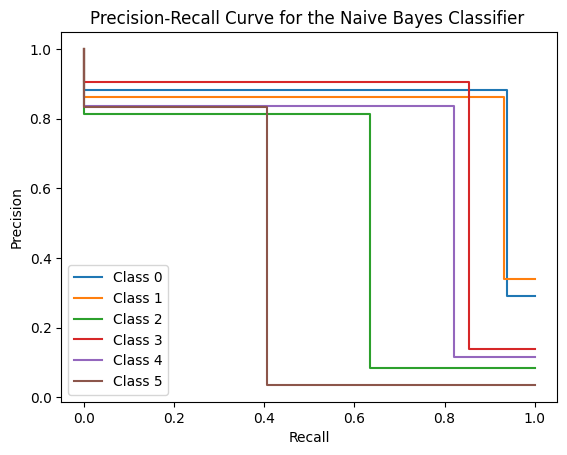

In [9]:
#The precision-recall curve for each class

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Convert labels to binary format
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute precision, recall, and thresholds for each class
precisions = dict()
recalls = dict()
thresholds = dict()
for i, emotion in enumerate(np.unique(y_test)):
    precision, recall, threshold = precision_recall_curve(y_test_bin[:, i], predictions == emotion, pos_label=True)
    precisions[emotion] = precision
    recalls[emotion] = recall
    thresholds[emotion] = threshold

# Plot precision-recall curve for each class
plt.figure()
for i, emotion in enumerate(np.unique(y_test)):
    if emotion in precisions and emotion in recalls:
        plt.step(recalls[emotion], precisions[emotion], where='post', label=f'Class {emotion}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for the Naive Bayes Classifier ')
plt.legend()
plt.show()

#update of the NBC to have some more metrics

#Since the Naive Bayes Classifier is a probabilistic model, it doesn't have a traditional training loss that can be plotted.


In [10]:
# The Naive Bayes Classifier algo

import numpy as np
from collections import defaultdict
import pandas as pd
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

# Load training data
train_data = pd.read_csv('/content/drive/MyDrive/colab notebook/AI_Project/train_data.csv')
X_train = train_data['X_train'].tolist()
y_train = train_data['y_train'].tolist()

# Load test data
test_data = pd.read_csv('/content/drive/MyDrive/colab notebook/AI_Project/test_data.csv')
X_test = test_data['X_test'].tolist()
y_test = test_data['y_test'].tolist()

# Tokenization
X_train_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_train]
X_test_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_test]

# Convert tokenized texts to strings for CountVectorizer
X_train_texts = [' '.join(tokens) for tokens in X_train_raw]
X_test_texts = [' '.join(tokens) for tokens in X_test_raw]

# Create CountVectorizer and limit vocabulary to the top 1000 words
vectorizer = CountVectorizer(max_features=1000)
X_train_bow = vectorizer.fit_transform(X_train_texts)
X_test_bow = vectorizer.transform(X_test_texts)


class NaiveBayesClassifier:
    def __init__(self):
        self.class_counts = defaultdict(int)
        self.word_counts = defaultdict(lambda: defaultdict(int))
        self.vocab = set()

    def train(self, X, y):
        for i in range(len(X)):
            tokens = X[i]
            emotion = y[i]
            self.class_counts[emotion] += 1
            for token in tokens:
                self.word_counts[emotion][token] += 1
                self.vocab.add(token)

    def predict(self, X):
        predictions = []
        for i, tokens in enumerate(X):
            if i % 100 == 0:
                print("Processing instance", i+1, "of", len(X))
            emotion_log_probs = []
            for emotion in self.class_counts:
                log_prob = np.log(self.class_counts[emotion] / sum(self.class_counts.values()))
                denominator = sum(self.word_counts[emotion].values()) + len(self.vocab)
                log_prob += sum(np.log((self.word_counts[emotion][token] + 1) / denominator) for token in tokens)
                emotion_log_probs.append(log_prob)
            max_idx = np.argmax(emotion_log_probs)
            pred_emotion = list(self.class_counts.keys())[max_idx]
            predictions.append(pred_emotion)
        return predictions


# Create Naive Bayes Classifier instance
classifier = NaiveBayesClassifier()

# Train the classifier
classifier.train(X_train_raw, y_train)

# Make predictions on the testing data
predictions = classifier.predict(X_test_raw)

# Evaluate the accuracy of the classifier
accuracy = sum(1 for pred, true in zip(predictions, y_test) if pred == true) / len(y_test)
print("Accuracy:", accuracy)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Processing instance 1 of 83362
Processing instance 101 of 83362
Processing instance 201 of 83362
Processing instance 301 of 83362
Processing instance 401 of 83362
Processing instance 501 of 83362
Processing instance 601 of 83362
Processing instance 701 of 83362
Processing instance 801 of 83362
Processing instance 901 of 83362
Processing instance 1001 of 83362
Processing instance 1101 of 83362
Processing instance 1201 of 83362
Processing instance 1301 of 83362
Processing instance 1401 of 83362
Processing instance 1501 of 83362
Processing instance 1601 of 83362
Processing instance 1701 of 83362
Processing instance 1801 of 83362
Processing instance 1901 of 83362
Processing instance 2001 of 83362
Processing instance 2101 of 83362
Processing instance 2201 of 83362
Processing instance 2301 of 83362
Processing instance 2401 of 83362
Processing instance 2501 of 83362
Processing instance 2601 of 83362
Processing instance 2701 of 83362
Processing instance 2801 of 83362
Processing instance 2901 o